## $\textbf{Imports}$

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel

## $\textbf{Pure python function}$

In [77]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):
    
    for _ in range(nt):
        
        for l in range(nx):
            un[l] = u[l]
        for i in range(1, nx):             
            u[i] = un[i] - (un[i]*(dt/dx))*(un[i] - un[i-1])
            
    return 0

## $\textbf{Numba Accelerator}$

In [78]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):
    
    for _ in range(nt):
        un[:] = u[:]
        
        for i in range(1, nx):             
            u[i] = un[i] - (un[i]*(dt/dx))*(un[i] - un[i-1])
            
    return 0

## $\textbf{Pyccel Accelerator}$

In [79]:
def solve_1d_nonlinearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float'):
    
    for n_nt in range(nt):
        
        for l in range(nx):
            un[l] = u[l]
        for i in range(1, nx):             
            u[i] = un[i] - (un[i]*(dt/dx))*(un[i] - un[i-1])
            
    return 0

## $\textbf{Inputs}$

$\textbf{For nx = 41}$

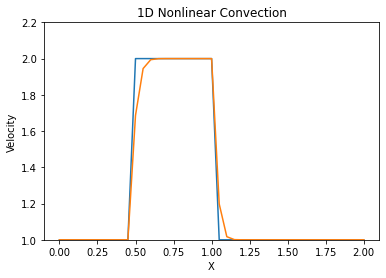

In [80]:
nx = 41
dx = 2 / (nx-1)
nt = 10    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pyccel(u, un, nt, nx, dt, dx)

plt.plot(grid,u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Nonlinear Convection')
plt.show()

$\textbf{For nx = 81}$

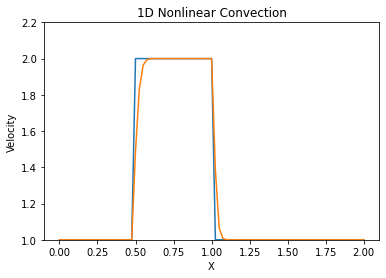

In [81]:
nx = 81
dx = 2 / (nx-1)
nt = 10    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pyccel(u, un, nt, nx, dt, dx)

plt.plot(grid,u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Nonlinear Convection')
plt.show()

$\textbf{For nx = 500 and nt = 100}$

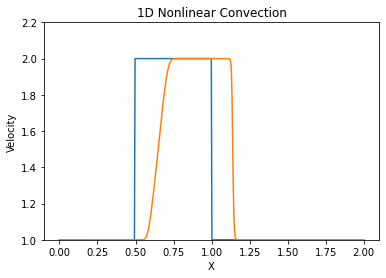

In [89]:
nx = 500
dx = 2 / (nx-1)
nt = 100    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pyccel(u, un, nt, nx, dt, dx)

plt.plot(grid,u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Nonlinear Convection')
plt.show()

**With $\textbf{41 and 81}$ samples, nothing changes for the convection of U. With nx = 500 and nt = 100, the convection of U changes.**

## $\textbf{Call Funtions}$

### $\textbf{Pure function}$

In [82]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

4.7 ms ± 569 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### $\textbf{Function with numba accelerator}$

In [83]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

14.7 µs ± 9.46 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### $\textbf{Function with pyccel accelerator}$

In [84]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [85]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

4.66 µs ± 825 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


$\textbf{Numba implementation runs faster than pure function implementation. Pyccel accelerator does better than both.}$